In [1]:
from glob import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
sns.set_style("whitegrid")

In [2]:
glob("data/*.csv")

['data/Airbnb Dataset 19.csv', 'data/HRDataset_v14.csv']

## 1. Reading the datasets

In [3]:
airbnb_df = pd.read_csv("data/Airbnb Dataset 19.csv")
hr_df = pd.read_csv("data/HRDataset_v14.csv")

In [4]:
display(airbnb_df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [5]:
display(hr_df.head())

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## 2. Dataset info

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## 3. Data Cleaning

In [8]:
# Fixing the data type of date column for airbnb dataset
airbnb_df["last_review"] = pd.to_datetime(airbnb_df["last_review"])

In [9]:
# Fixing the data type of date column for hr dataset
hr_df["DOB"] = pd.to_datetime(hr_df["DOB"], format="%m/%d/%y")
hr_df["DateofHire"] = pd.to_datetime(hr_df["DateofHire"], format="%m/%d/%Y")
hr_df["DateofTermination"] = pd.to_datetime(hr_df["DateofTermination"], format="%m/%d/%Y")
hr_df["LastPerformanceReview_Date"] = pd.to_datetime(hr_df["LastPerformanceReview_Date"], format="%m/%d/%Y")

In [10]:
# Dropping unnecessary columns
hr_df = hr_df.drop(columns=["MarriedID", "MaritalStatusID", "GenderID"])

## 4. Feature Engineering

In [11]:
# Creating tenure spent in days in the company
hr_df["tenure_days"] = np.round(
    np.subtract(
        hr_df["DateofTermination"],
        hr_df["DateofHire"]
    ) / pd.Timedelta("1 day"), 4)

# Extracting year from the hiring and termination date columns
hr_df["hire_year"] = hr_df["DateofHire"].dt.year
hr_df["termination_year"] = hr_df["DateofTermination"].dt.year

## 5. Data Visualization

### i. How the distribution of price looks like?

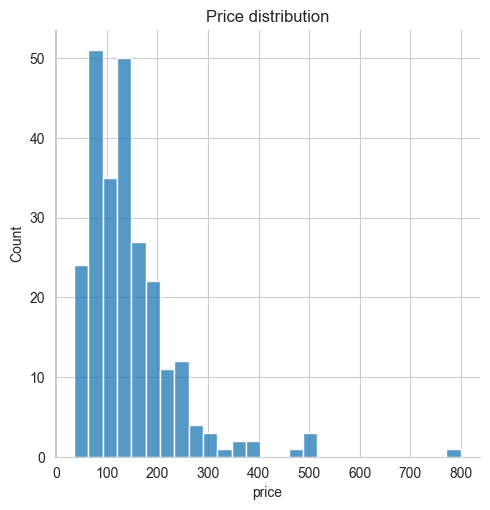

In [12]:
sns.displot(x="price", data=airbnb_df)

plt.title("Price distribution")
plt.show()

**Observation:** The price distribution is right-skewed. Most of the properties have a price in the range [50,200]

### ii. Neighbourhood groups available in the dataset

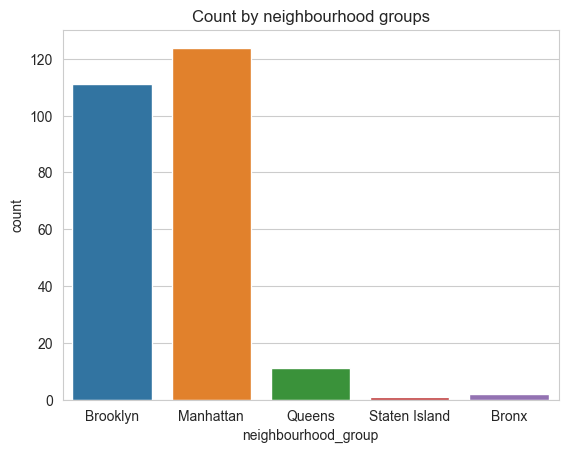

In [13]:
sns.countplot(x="neighbourhood_group", data=airbnb_df)

plt.title("Count by neighbourhood groups")
plt.show()

**Observation:** Rooms from Manhattan is available the most in this dataset followed by Brooklyn, and Queens

### iii. Price of the rooms by neighbourhood groups

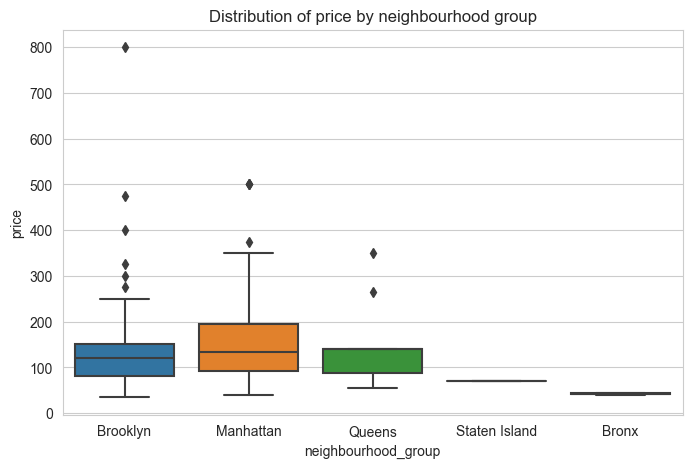

In [14]:
plt.figure(figsize=(8, 5))

sns.boxplot(x="neighbourhood_group", y="price", data=airbnb_df)
plt.title("Distribution of price by neighbourhood group")
plt.show()

**Observations:**

* The median price of rooms available in the Manhattan > Brooklyn
* For Queens the median and 75th percentile is the same. Also median price is more than Brooklyn

### iv. Minimum nights by neighbourhood group

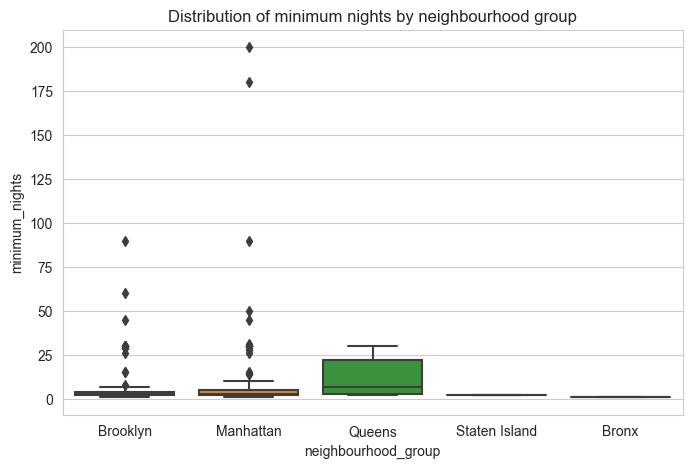

In [15]:
plt.figure(figsize=(8, 5))

sns.boxplot(x="neighbourhood_group", y="minimum_nights", data=airbnb_df)
plt.title("Distribution of minimum nights by neighbourhood group")
plt.show()

**Observation:** The median minimum nights need to spend in Queens is the most.

### v. Gender distribution in the dataset

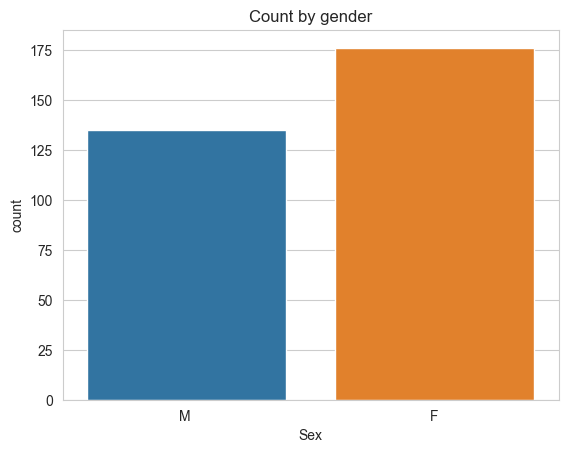

In [16]:
sns.countplot(x="Sex", data=hr_df)

plt.title("Count by gender")
plt.show()

**Obervation:** The dataset has more samples for Female employees

### vi. From which sources employees are recruited?

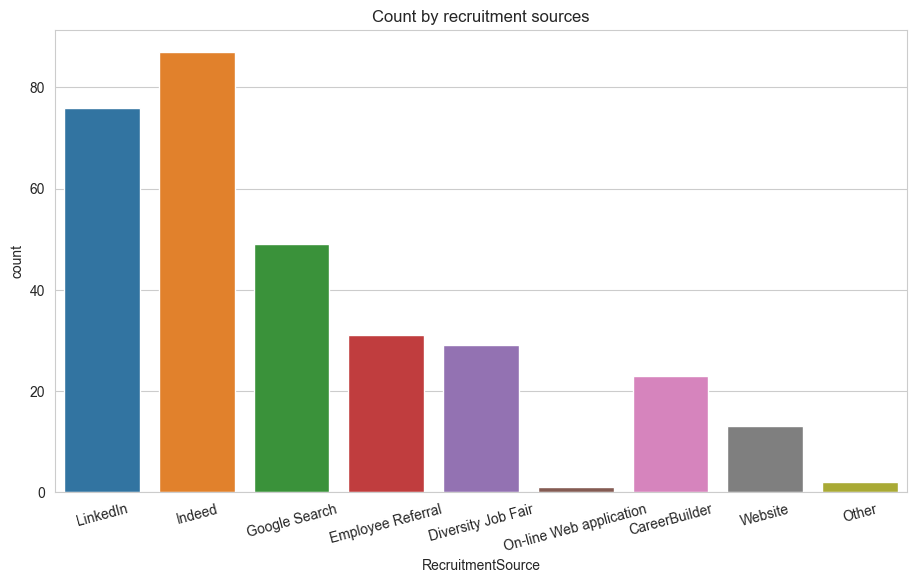

In [17]:
plt.figure(figsize=(11, 6))

sns.countplot(x="RecruitmentSource", data=hr_df)
plt.xticks(rotation=15)

plt.title("Count by recruitment sources")
plt.show()

**Obervation:** Majority of the employees were recruited from Indeed followed by LinkedIn and Google Search

### vii. Salary by department

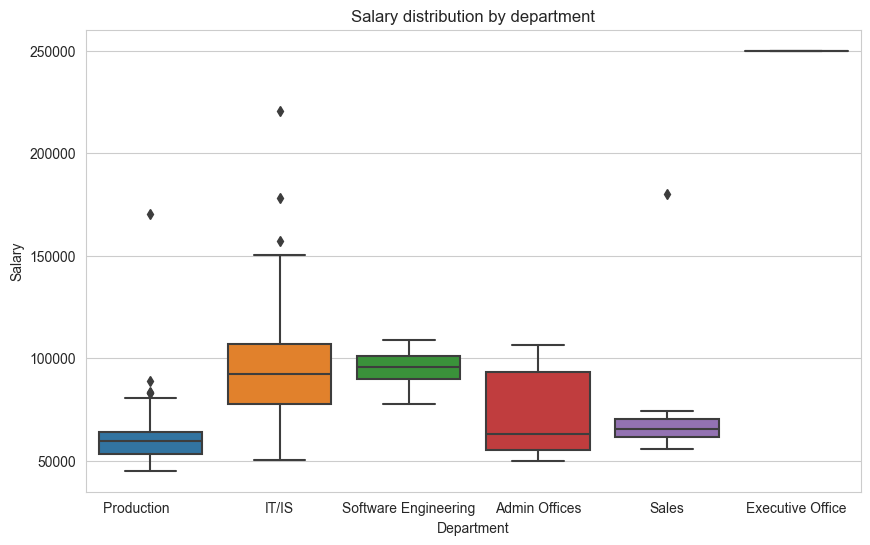

In [18]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Department", y="Salary", data=hr_df)

plt.title("Salary distribution by department")
plt.show()

**Observations:**

* The median salary of Software Engineering department is more than other departments except Executive Office
* There are some outlier salaries in the IT/IS department, this maybe dependent on the years of experience

### viii. Observing hiring and termination trend by year

In [19]:
hire_year_agg = hr_df.groupby("hire_year").agg({"EmpID": "count"}).reset_index()
termination_year_agg = hr_df.groupby("termination_year").agg({"EmpID": "count"}).reset_index()

hire_year_agg.rename(columns={"EmpID": "count"}, inplace=True)
termination_year_agg.rename(columns={"EmpID": "count"}, inplace=True)

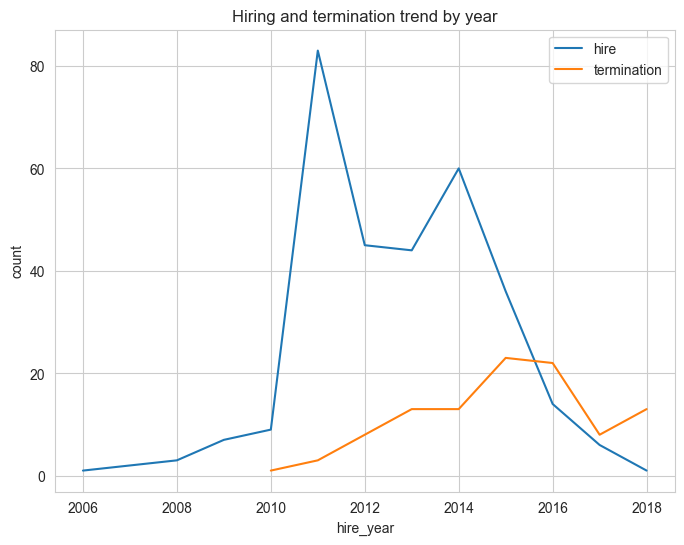

In [20]:
plt.figure(figsize=(8, 6))

sns.lineplot(x="hire_year", y="count", data=hire_year_agg, label="hire")
sns.lineplot(x="termination_year", y="count", data=termination_year_agg, label="termination")

plt.title("Hiring and termination trend by year")
plt.show()

**Observations:**

* Majority of the employees were hired in 2011 and suddenly it drops after 2014
* Organization observed most of the termination in 2015

`Looks like something is happened in 2014-2016`

### ix. From which department employees left the most?

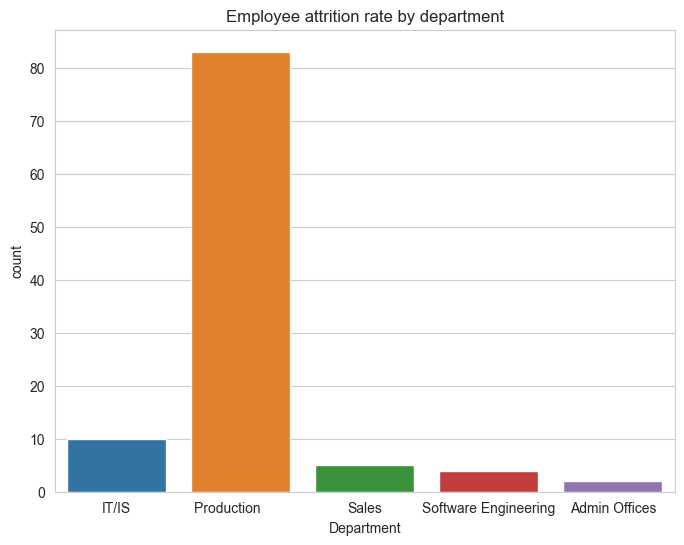

In [21]:
plt.figure(figsize=(8, 6))

sns.countplot(x="Department", data=hr_df.loc[hr_df["DateofTermination"].notnull()])

plt.title("Employee attrition rate by department")
plt.show()

**Observation:** Production department has the highest rate of employee attrition followed by IT and Sales

### x. Observing employee satisfaction by department

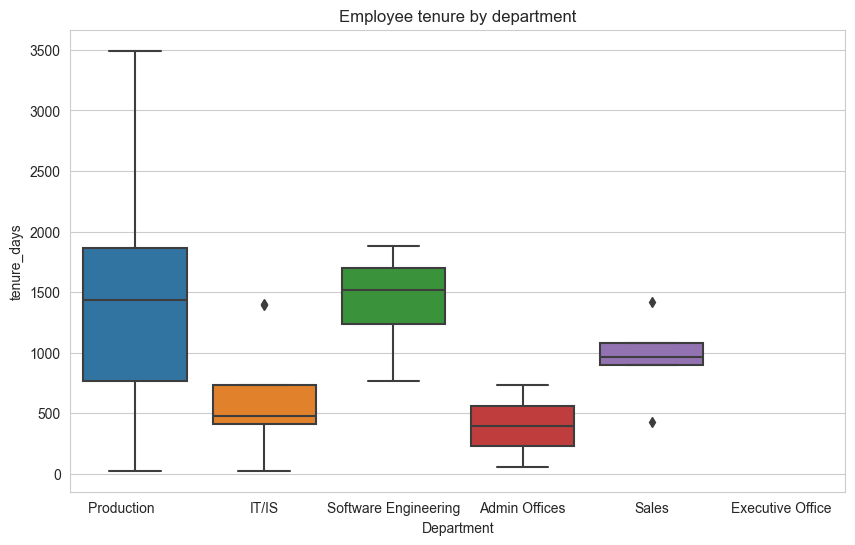

In [22]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Department", y="tenure_days", data=hr_df)

plt.title("Employee tenure by department")
plt.show()

**Observations:**

* Even the production department has higher attrition rate but the median of tenure spent is nearly 1500 days and is comparable with Software Engineering
* It is suprising to see some of the departments have employee tenure near to zero
* The min tenure for Software Engineering is nearly 750 days which is really good as compared to the other departments